# Goal
The goal is to find the text with the type as a paragraph that has the following two topics:

- Diversity (diversity, workforce, workplace, employees, inclusion, inclusive, equity, diverse, human, equality, cultural, people, blacks, gender)

- Data Security (privacy, data breaches, cybersecurity, compliance, privacy act)

You can use the keywords for each topic to assign and find the relevant topics. First, explain the possible solutions in a document, and choose the best one you think is working. **Accuracy is more important than time**. So, you should propose the most accurate solution to find the context from keywords and the relevant text with each topic. So retrieval is not based on the existence of keywords.

## Library installation

In [1]:
!pip install transformers torch sentence-transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

## Imports

In [2]:
from sentence_transformers import SentenceTransformer
import torch
import pandas as pd

## Data Reading and Manuplation

In [18]:
df = pd.read_csv('Chegg-ESG-Report-2021.csv', index_col=0)

In [19]:
# Define the corpus (the text data you want to search)
corpus = df[df.type == 'paragraph'].text.tolist()

# Define the topics for Diversity and Data Security
topics = {
    "Diversity": "diversity, inclusion, workforce, equality, gender, cultural",
    "Data Security": "data security, privacy, cybersecurity, data breaches, compliance"
}

## Looking through data

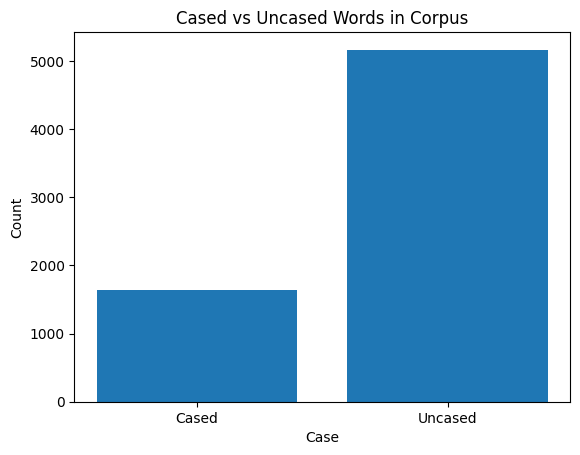

In [20]:
# How many cased and uncased data is in corpus? make a graph?

import matplotlib.pyplot as plt

# Count cased and uncased words
cased_count = sum(1 for text in corpus for word in text.split() if any(c.isupper() for c in word))
uncased_count = sum(1 for text in corpus for word in text.split() if all(c.islower() for c in word))

# Create a bar chart
labels = ['Cased', 'Uncased']
counts = [cased_count, uncased_count]

plt.bar(labels, counts)
plt.xlabel('Case')
plt.ylabel('Count')
plt.title('Cased vs Uncased Words in Corpus')
plt.show()


In [21]:
# Most used cased words - top 20

from collections import Counter

# Extract cased words and count their frequency
cased_words = [word for text in corpus for word in text.split() if any(c.isupper() for c in word)]
word_counts = Counter(cased_words)

# Get the 20 most common cased words
top_20_cased = word_counts.most_common(20)

# Print the results
for word, count in top_20_cased:
    print(f"{word}: {count}")


Chegg: 86
We: 59
U.S.: 34
GRI: 23
Cheggs: 21
Global: 21
tCO: 20
The: 19
ESG: 17
Study: 16
Female: 15
Our: 14
Best: 14
Manager: 13
In: 12
Board: 12
Data: 12
TC: 12
Male: 12
Chegg.org: 11


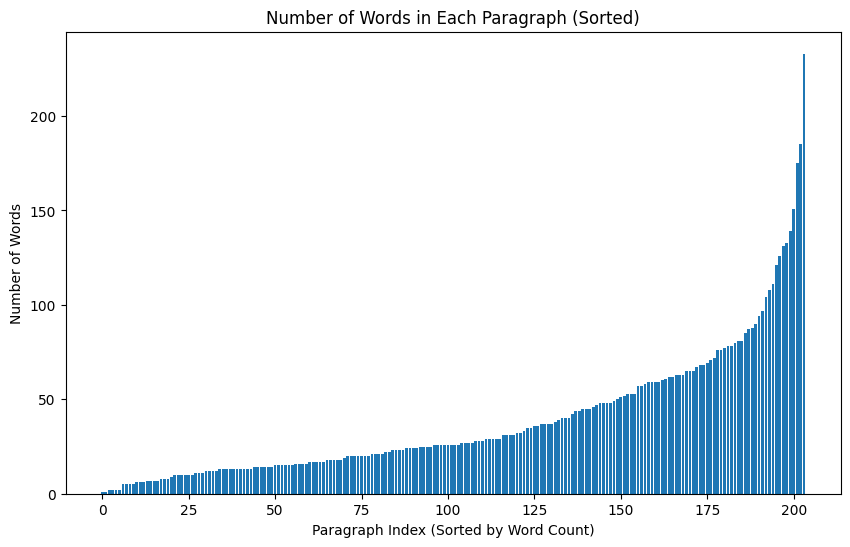

In [74]:
# prompt: A sorted barplot of the number of words in each paragraph

# Calculate the number of words in each paragraph
word_counts = [len(text.split()) for text in corpus]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(range(len(corpus)), sorted(word_counts))
plt.xlabel('Paragraph Index (Sorted by Word Count)')
plt.ylabel('Number of Words')
plt.title('Number of Words in Each Paragraph (Sorted)')
####################################
# Toggle this to zoom in the start #
####################################
# plt.ylim(0, 25)
plt.show()




In [40]:
# prompt: Show paragraphs that are less than 10 words

# Filter paragraphs with less than 10 words
short_paragraphs = [text for text in corpus if len(text.split()) < 10]

# Print the short paragraphs
for paragraph in short_paragraphs:
  print(paragraph)
  print("----")


Female representation among Global Employees
----
Scope 1 2 Greenhouse Gas emissions
----
Corporate Giving across Chegg and our Chegg.org Impact Fund
----
Minority representation among US Employees
----
Some examples of CBD Programming:
----
U.S.
----
U.S.
----
Global employees
----
31% of U.S. employees participate in ERGs
----
$1154 Spent per employee on training in 2021
----
The key pillars of our security organization include:
----
Policy Goal:
----
Policy Goal:
----
Support better data transparency in postsecondary education
----
U.S. college students say they need help
----
61% say they need help managing personal finances
----
Percentage of Employees located outside of U.S.
----
GRI 405 1 66 Diversity Snapshot
----
TC IM 330a.2 TC SI 330a.2
----
Yes 94
----
Cybersecurity, Testing Auditing, Employee Training
----


In [75]:
# filter the paragraphs that have less than 3 words from the corpus
par = df[df.type=='paragraph']
par = par[par.text.apply(lambda x: len(x.split()) > 4)]
par

,page_number,type,text
3,2,paragraph,Over the last decade we have focused on puttin...
4,2,paragraph,The pace of evolution within the learning ecos...
6,2,paragraph,Weve also seen the challenges of the last few ...
7,2,paragraph,Chegg seeks to always serve as a valued and re...
9,3,paragraph,We know that the heart of Chegg is our incredi...
...,...,...,...
531,32,paragraph,Corporate Giving Research Advocacy Community E...
532,32,paragraph,"(1) In 2020 and 2021 respectively, 4 and 17 of..."
538,33,paragraph,Total Board Members GRI 102 9 10 9 Board of Di...
544,34,paragraph,Code of Business Conduct and Ethics GRI 205 2 ...


In [76]:
corpus = par.text.tolist()

## What model?

### Symmetric vs. Asymmetric Semantic Search
A critical distinction for your setup is symmetric vs. asymmetric semantic search:

For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.

- Related training example: Quora Duplicate Questions.

- Suitable models: Pre-Trained Sentence Embedding Models

For asymmetric semantic search, you usually have a short query like a ***question or some keywords*** and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you want to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

- Related training example: MS MARCO

- Suitable models: Pre-Trained MS MARCO Models

It is critical that you choose the right model for your type of task.

Source : https://www.sbert.net/examples/applications/semantic-search/README.html

In [77]:
# We can use msmarco-distilbert-base-v4
model_name = 'msmarco-distilbert-base-v4'
model = SentenceTransformer('msmarco-distilbert-base-v4')

In [78]:
# Encode the corpus and topics using the model
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
topic_embeddings = {topic: model.encode(topic_description, convert_to_tensor=True)
                    for topic, topic_description in topics.items()}


In [79]:
#Create a dataframe df_diversity and df_data_sec and store each text with their score there

df_diversity = pd.DataFrame(columns=['text', 'score'])
df_data_sec = pd.DataFrame(columns=['text', 'score'])

for i, text_embedding in enumerate(corpus_embeddings):
    diversity_score = model.similarity(topic_embeddings['Diversity'], text_embedding).item()
    data_sec_score = model.similarity(topic_embeddings['Data Security'], text_embedding).item()

    # concat
    df_diversity = pd.concat([df_diversity, pd.DataFrame({'text': [corpus[i]], 'score': [diversity_score]})], ignore_index=True)
    df_data_sec = pd.concat([df_data_sec, pd.DataFrame({'text': [corpus[i]], 'score': [data_sec_score]})], ignore_index=True)

In [80]:
df_diversity

,text,score
0,Over the last decade we have focused on puttin...,0.368222
1,The pace of evolution within the learning ecos...,0.391522
2,Weve also seen the challenges of the last few ...,0.143395
3,Chegg seeks to always serve as a valued and re...,0.315924
4,We know that the heart of Chegg is our incredi...,0.418762
...,...,...
193,Corporate Giving Research Advocacy Community E...,0.194144
194,"(1) In 2020 and 2021 respectively, 4 and 17 of...",0.109365
195,Total Board Members GRI 102 9 10 9 Board of Di...,0.082688
196,Code of Business Conduct and Ethics GRI 205 2 ...,0.203067


In [81]:
df_data_sec

,text,score
0,Over the last decade we have focused on puttin...,0.228483
1,The pace of evolution within the learning ecos...,0.070875
2,Weve also seen the challenges of the last few ...,0.145112
3,Chegg seeks to always serve as a valued and re...,0.171429
4,We know that the heart of Chegg is our incredi...,0.082648
...,...,...
193,Corporate Giving Research Advocacy Community E...,0.076532
194,"(1) In 2020 and 2021 respectively, 4 and 17 of...",0.100151
195,Total Board Members GRI 102 9 10 9 Board of Di...,0.129476
196,Code of Business Conduct and Ethics GRI 205 2 ...,0.381835


## Saving data frames and conculsion
I rather go with a 'softmax' function to classify each label. In another approach, we can use different transformers to get different scores and then average them for each topic, then do a softmax. 

In [ ]:
# prompt: Put the df_data_sec and df_diversity scores to a softmax so that for each paragrpah we would have softamax probabilty

import torch.nn.functional as F

# Extract scores as tensors
diversity_scores = torch.tensor(df_diversity['score'].tolist())
data_sec_scores = torch.tensor(df_data_sec['score'].tolist())

# Stack scores and apply softmax
all_scores = torch.stack([diversity_scores, data_sec_scores], dim=1)
softmax_probs = F.softmax(all_scores, dim=1)

# Add softmax probabilities to dataframes
df_diversity['softmax_score'] = softmax_probs[:, 0].tolist()
df_data_sec['softmax_score'] = softmax_probs[:, 1].tolist()


In [ ]:
df_diversity

In [ ]:
df_data_sec

In [84]:
#save to csv
df_diversity[df_diversity.softmax_score > 0.5].to_csv('df_diversity.csv')
df_data_sec[df_data_sec.softmax_score > 0.5].to_csv('df_data_sec.csv')